Installing Scikit-Learn, TensorFlow, and Keras for Machine Learning

In [ ]:
!pip install scikeras
!pip install tensorflow==2.15.0
!pip install keras==2.15.0

IMPORTING LIBRARIES

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import drive

import pandas_datareader as pdr


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOADING THE DATASET

In [ ]:
main1df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ETH-USD.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
main1df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
main1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2205 non-null   object 
 1   Open       2205 non-null   float64
 2   High       2205 non-null   float64
 3   Low        2205 non-null   float64
 4   Close      2205 non-null   float64
 5   Adj Close  2205 non-null   float64
 6   Volume     2205 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.7+ KB


In [ ]:
main1df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2.205000e+03
mean,1220.155716,1255.501831,1180.946165,1220.749609,1220.749609,1.206083e+10
std,1120.361839,1152.833067,1083.315215,1119.923136,1119.923136,1.023349e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,229.167694,234.145004,224.494995,229.119217,229.119217,4.664134e+09
50%,856.185974,880.543030,818.549988,857.224976,857.224976,9.297812e+09
75%,1840.391968,1871.603516,1804.716675,1842.401489,1842.401489,1.668864e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [ ]:
print('Null Values:',main1df.isnull().values.sum())

Null Values: 0


In [ ]:
# Printing the start date and End date of the dataset

sd=main1df.iloc[0][0]
ed=main1df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-11-09
Ending Date 2023-11-22


In [ ]:
main1df['Date'] = pd.to_datetime(main1df['Date'], format='%Y-%m-%d')

y_overall = main1df.loc[(main1df['Date'] >= '2017-11-09')
                     & (main1df['Date'] <= '2023-11-22')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-11-09,308.644989,329.451996,307.056000,320.884003
1,2017-11-10,320.670990,324.717987,294.541992,299.252991
2,2017-11-11,298.585999,319.453003,298.191986,314.681000
3,2017-11-12,314.690002,319.153015,298.513000,307.907990
4,2017-11-13,307.024994,328.415009,307.024994,316.716003
...,...,...,...,...,...
2200,2023-11-18,1961.671265,1971.462280,1921.062378,1963.285034
2201,2023-11-19,1963.180054,2015.633911,1944.900879,2013.204468
2202,2023-11-20,2011.853394,2066.409912,1996.044312,2022.239136
2203,2023-11-21,2022.217285,2035.035889,1937.066772,1937.066772


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1184.041902,1185.483545
February,1231.736623,1232.698192
March,1199.143652,1202.004503
April,1357.673519,1361.708027
May,1384.583424,1380.130546
June,1102.155580,1094.786001
July,1054.690904,1059.142719
August,1244.084369,1246.435828
September,1207.893150,1204.067879


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
close1df = main1df[['Date','Close']]
print("Shape of close dataframe:", close1df.shape)

Shape of close dataframe: (2205, 2)


In [ ]:
fig = px.line(close1df, x=close1df.Date, y=close1df.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2017-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
close1df = close1df[close1df['Date'] > '2021-02-19']
close_stock = close1df.copy()
print("Total data for prediction: ",close1df.shape[0])

Total data for prediction:  1006


In [ ]:
close1df

,Date,Close
1199,2021-02-20,1919.534058
1200,2021-02-21,1935.601074
1201,2021-02-22,1781.992920
1202,2021-02-23,1570.203979
1203,2021-02-24,1626.575684
...,...,...
2200,2023-11-18,1963.285034
2201,2023-11-19,2013.204468
2202,2023-11-20,2022.239136
2203,2023-11-21,1937.066772


In [ ]:
fig = px.line(close1df, x=close1df.Date, y=close1df.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Ethereum close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del close1df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
close1df=scaler.fit_transform(np.array(close1df).reshape(-1,1))
print(close1df.shape)

(1006, 1)


MODEL TRAINING

In [ ]:
training_size=int(len(close1df)*0.60)
test_size=len(close1df)-training_size
train_data,test_data=close1df[0:training_size,:],close1df[training_size:len(close1df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (603, 1)
test_data:  (403, 1)


 Preparing a time series dataset for forecasting using a sliding window approach

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Creating Training and Testing Dataset

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (587, 15)
y_train:  (587,)
X_test:  (387, 15)
y_test (387,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (587, 15, 1)
X_test:  (387, 15, 1)


CREATING LSTM MODEL USING A FUNCTIONAL API & CROSS VALIDATION USING GRID SEARCH

In [ ]:
def create_model(optimizer='adam'):
    inputs = Input(shape=(None, 1))
    x = LSTM(10, activation='relu')(inputs)

    # Five hidden layers
    for _ in range(5):
        x = Dense(16, activation='relu')(x)

    output = Dense(1)(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the Keras model instance
keras_model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the parameters grid to search through
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'epochs': [100, 150, 200],
    'batch_size': [32, 64, 128],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.2573
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2223
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1836
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1407
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0891
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 11/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.1303
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0994
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0419
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0147
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 0.3254
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2949
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2603
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2133
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1536
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2127
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1120
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0421
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 12/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 5ms/step - loss: 0.1273
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0570
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0267
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 0.2858
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1843
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2297
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1404
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 0.1169
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2674
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0445
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2414
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1684
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0449
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 7/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 9/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 10/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 11/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 12/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.1196
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0324
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 9/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 10/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 11/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 12/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 4ms/step - loss: 0.2835
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0654
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 9/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 10/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 11/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 12/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2168
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.1024
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0403
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.1309
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0361
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 12/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2963
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.2189
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1306
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 11/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 8s 7ms/step - loss: 0.2491
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.1868
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1174
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0564
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0368
Epoch 6/150
13/13 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 10/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 11/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 7ms/step - loss: 0.1179
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0679
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0284
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 10/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 12/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 6ms/step - loss: 0.2107
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 5ms/step - loss: 0.2423
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1623
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0426
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0274
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1144
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0573
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2859
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1765
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0638
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2208
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0476
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0321
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 6ms/step - loss: 0.0892
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0254
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 4ms/step - loss: 0.2661
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1358
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0400
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 12/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2431
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1738
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0953
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.1028
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 4ms/step - loss: 0.2968
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2048
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1036
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 11/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 12/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.2650
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2216
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1836
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1410
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0983
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0642
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0291
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.1378
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1216
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1024
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0355
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0169
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 13/100
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.3130
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2612
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2098
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1549
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0980
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.2576
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2327
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2021
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1626
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1165
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0321
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0351
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0211
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 13/100
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.1116
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0588
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0270
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0206
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 6ms/step - loss: 0.2997
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2463
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1857
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1200
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0570
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0175
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0172
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 13/100
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 4ms/step - loss: 0.2613
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2330
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2045
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1743
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1437
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1133
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0870
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0679
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0580
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 13/100
7/7 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 6ms/step - loss: 0.1295
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1089
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0872
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0398
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0248
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0213
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 13/100
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.3141
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2445
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1696
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0931
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0309
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 13/100
7/7 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 9ms/step - loss: 0.1916
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1053
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0403
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0144
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 6/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 9/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 10/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 11/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 12/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 13/150
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.1322
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1086
Epoch 3/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0560
Epoch 5/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 8/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 12/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 13/150
7/7 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 5ms/step - loss: 0.2938
Epoch 2/150
7/7 [==============================] - 0s 5ms/step - loss: 0.2335
Epoch 3/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1733
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1044
Epoch 5/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0450
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 9/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 13/150
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.2583
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2377
Epoch 3/150
7/7 [==============================] - 0s 5ms/step - loss: 0.2147
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1891
Epoch 5/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1611
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1299
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0983
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0687
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0404
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0297
Epoch 13/150
7/7 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.1161
Epoch 2/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 5/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0205
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 12/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 13/150
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 6ms/step - loss: 0.3070
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2610
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1994
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1300
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0638
Epoch 6/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0210
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 8/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 12/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 13/150
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 8ms/step - loss: 0.2014
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1352
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0693
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0287
Epoch 5/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0239
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 8/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 12/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 13/150
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 9ms/step - loss: 0.1390
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1279
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1194
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1102
Epoch 5/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1002
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0891
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 8/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 12/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0287
Epoch 13/150
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 5ms/step - loss: 0.3228
Epoch 2/150
7/7 [==============================] - 0s 5ms/step - loss: 0.2923
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2533
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.2081
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1561
Epoch 6/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1009
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0230
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 13/150
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 7ms/step - loss: 0.2549
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2235
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1889
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1508
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1113
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0747
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0372
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0252
Epoch 11/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0157
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 13/200
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.1158
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0756
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0437
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0269
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0195
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0164
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 11/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 13/200
7/7 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 5ms/step - loss: 0.3304
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.2998
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2755
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2467
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2117
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1689
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1202
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0342
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0318
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0303
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0262
Epoch 13/200
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 5ms/step - loss: 0.2621
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2394
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2178
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1933
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1661
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1362
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1032
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0736
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0389
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0308
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 13/200
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 11ms/step - loss: 0.1310
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1082
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0831
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0590
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0396
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0319
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0243
Epoch 11/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0208
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 13/200
7/7 [==============================] - 0s 5ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 5ms/step - loss: 0.3187
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2510
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1908
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1209
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 11/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 12/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 13/200
7/7 [==============================] - 0s 8ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.2474
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2042
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1501
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0888
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0365
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 13/200
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 5ms/step - loss: 0.1300
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1008
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0727
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0301
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0262
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0221
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 13/200
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.3488
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3102
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2935
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2752
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2564
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2365
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2152
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1915
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1634
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1324
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0940
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 13/200
7/7 [==============================] - 0s 6ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 0.2665
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2524
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2390
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2251
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2110
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1955
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1798
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1623
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1437
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1250
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1057
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0869
Epoch 13/100
4/4 [==============================] - 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 6s 10ms/step - loss: 0.1373
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1297
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1222
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1138
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1056
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0970
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0879
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0649
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0531
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0428
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0347
Epoch 13/100
4/4 [==============================] - 0s 7ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



4/4 [==============================] - 2s 11ms/step - loss: 0.2891
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2361
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1853
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1366
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0925
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0561
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0201
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0176
Epoch 13/100
4/4 [==============================] - 0s 7ms/step - loss:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 12ms/step - loss: 0.2613
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2441
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2304
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2150
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1977
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1791
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1590
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1367
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1131
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0896
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0685
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0504
Epoch 13/100
4/4 [==============================] - 0s 9m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 0.1291
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1124
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0925
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0726
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0555
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0399
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0218
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0228
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0212
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0177
Epoch 13/100
4/4 [==============================] - 0s 7ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.2552
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2013
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1460
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0909
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0446
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0206
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0185
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 13/100
4/4 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.2605
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2450
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2297
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2136
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1972
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1797
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1621
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1444
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1259
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1078
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0893
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0737
Epoch 13/100
4/4 [==============================] - 0s 8ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.1305
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1105
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0913
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0730
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0564
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0422
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0322
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0277
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0267
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0266
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 13/100
4/4 [==============================] - 0s 9ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 13ms/step - loss: 0.3079
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2701
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2225
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1712
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1219
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0438
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0285
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0336
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0300
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 13/100
4/4 [==============================] - 0s 7ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 11ms/step - loss: 0.2603
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2470
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2328
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2177
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2015
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1851
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1673
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1487
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1304
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1112
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0934
Epoch 12/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 13/150
4/4 [==============================] - 0s 6ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 15ms/step - loss: 0.1310
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1171
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1032
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0893
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0749
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0457
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0325
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 11/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 13/150
4/4 [==============================] - 0s 8ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2851
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2486
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2125
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1746
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1353
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0958
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0586
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0294
Epoch 9/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 13/150
4/4 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 7ms/step - loss: 0.2321
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1863
Epoch 3/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1442
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1055
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0729
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0493
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0375
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0350
Epoch 9/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0342
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0259
Epoch 12/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0221
Epoch 13/150
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 6ms/step - loss: 0.1407
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1275
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1182
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1089
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0989
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0878
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0762
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0638
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0503
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0375
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0272
Epoch 12/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 13/150
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.3179
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2951
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2697
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2420
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2128
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1809
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1476
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1126
Epoch 9/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0773
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0460
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0242
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 13/150
4/4 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 9ms/step - loss: 0.2716
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2498
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.2308
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2136
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1950
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1745
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1529
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1303
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1070
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0837
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0628
Epoch 12/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0448
Epoch 13/150
4/4 [==============================] - 0s 8ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 7ms/step - loss: 0.1315
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.1122
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0933
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0572
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0426
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0315
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0257
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 13/150
4/4 [==============================] - 0s 8ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 7ms/step - loss: 0.3425
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.3162
Epoch 3/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2943
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2719
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2442
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2127
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1799
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.1455
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1094
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0742
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0438
Epoch 12/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 13/150
4/4 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.2685
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2585
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2500
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2406
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2304
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2204
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2105
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2007
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1904
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1798
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1692
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1582
Epoch 13/200
4/4 [==============================] - 0s 9ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 8ms/step - loss: 0.1438
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1292
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1199
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1101
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1001
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0901
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0802
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0705
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0613
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0449
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0383
Epoch 13/200
4/4 [==============================] - 0s 6ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.3410
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3088
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2860
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2628
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2390
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2128
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1845
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1534
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1212
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0889
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0573
Epoch 12/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0330
Epoch 13/200
4/4 [==============================] - 0s 10ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 8ms/step - loss: 0.2638
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2515
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2407
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2292
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2164
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2020
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1856
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1668
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1446
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1186
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0898
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0592
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 8ms/step - loss: 0.1397
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1279
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1163
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1044
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0920
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0457
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0392
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0354
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0338
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.3090
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2661
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2184
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1660
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1170
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0731
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 10/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0274
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0253
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 13/200
4/4 [==============================] - 0s 6ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.2616
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2442
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2249
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2031
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1793
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1556
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1324
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1106
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0892
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0730
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0608
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.1349
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1232
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1109
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0982
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0857
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0736
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0611
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0407
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0339
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0299
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0289
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 10ms/step - loss: 0.3252
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3110
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2966
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2809
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2639
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2452
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2244
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2011
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1760
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1480
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1171
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0844
Epoch 13/200
4/4 [==============================] - 0s 7ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
19/19 [==============================] - 2s 8ms/step - loss: 0.1816
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0585
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0372
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 11/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 12/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 13/100
19/19 [=================

In [ ]:
# Train the best model using the best parameters
best_model = create_model(optimizer=best_params['optimizer'])
history = best_model.fit(X_train, y_train,validation_data=(X_test,y_test),  epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 25ms/step - loss: 0.1647 - val_loss: 0.0047
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0851 - val_loss: 0.0222
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0648 - val_loss: 0.0410
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0593 - val_loss: 0.0513
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0578 - val_loss: 0.0564
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0572 - val_loss: 0.0615
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.0606
Epoch 8/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0567 - val_loss: 0.0616
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0564 - val_loss: 0.0626
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0562 - val_loss: 0.0615
Epoch

TRAINING LOSS VS VALIDATION LOSS

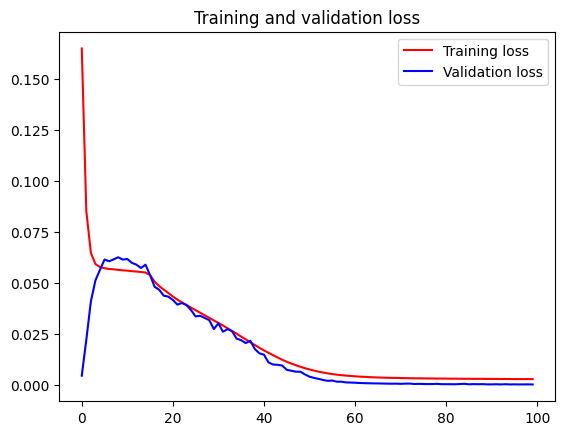

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Now you can make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)
train_predict.shape, test_predict.shape

13/13 [==============================] - 0s 2ms/step


((587, 1), (387, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

ACCURACY OF MODEL

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  208.59805818820465
Train data MSE:  43513.14987988961
Train data MAE:  158.56446943658167
-------------------------------------------------------------------------------------
Test data RMSE:  74.04597666592949
Test data MSE:  5482.806660411374
Test data MAE:  54.67916230258802


VISUALIZATION OF PRICE PREDICTIONS

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(close1df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(close1df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close1df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1006, 1)
Test predicted data:  (1006, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = best_model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = best_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(close1df[len(close1df)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=close1df.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [101]:
import joblib
import pickle

# saving the scaler object using joblib for later use in ensemble models
joblib.dump(scaler, '/content/drive/My Drive/Colab Notebooks/eth_scaler.pkl')

# Save the model
best_model.save('/content/drive/My Drive/Colab Notebooks/eth_best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

